<a href="https://colab.research.google.com/github/HernanDL/Noise-Cancellation-Using-GenAI/blob/main/Filters_for_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Gaussian Filter with Linear Phase (Forward-Backward Filtering)

The Gaussian filter is a widely used technique in signal processing for smoothing data, reducing noise, and preserving important features. When applied with linear phase, known as Forward-Backward Filtering, this method ensures that the filter's phase response is linear. Here’s why this technique is particularly effective for noise cancellation while preserving the phase:

1. **Linear Phase Response**:
   - **Forward-Backward Filtering**: By applying the Gaussian filter first in the forward direction and then in the backward direction, the phase distortions introduced during forward filtering are compensated in the backward pass. This ensures a linear phase response, meaning all frequency components of the signal are delayed by the same amount.
   - **Preservation of Phase**: This is crucial for applications like noise cancellation, where the phase of the signal must be preserved to maintain the integrity and alignment of the waveform.

2. **Effective Noise Reduction**:
   - **Smooths Out Noise**: The Gaussian filter is excellent at smoothing out noise without introducing significant artifacts. It averages the data points within a window using a Gaussian function, which gives more weight to points near the center of the window and less weight to those further away.
   - **Maintains Signal Features**: While smoothing, it preserves essential features of the signal, such as peaks and valleys, which is important for maintaining the quality and clarity of the audio signal.

3. **Minimal Amplitude Distortion**:
   - **Uniform Processing**: The symmetrical nature of the Gaussian function ensures uniform processing of the signal, which helps in maintaining the amplitude characteristics better than many other filtering techniques.
   - **Dynamic Range Preservation**: By carefully choosing the window size and sigma, the filter can reduce noise effectively while keeping the dynamic range of the signal intact.

### Conclusion

Using the Gaussian Filter with Linear Phase is ideal for noise cancellation because it reduces unwanted noise while preserving the critical phase information of the predicted signal. This balance ensures that the cleaned signal remains faithful to the original, making it a robust choice for applications where phase integrity is paramount, such as in audio processing and communication systems.


In [19]:
# Install necessary libraries
!pip install PyWavelets

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import filtfilt
from IPython.display import Audio, display
from google.colab import files

print('Load the predicted signal from the ML output')
uploaded = files.upload()


Saving download (1).wav to download (1).wav


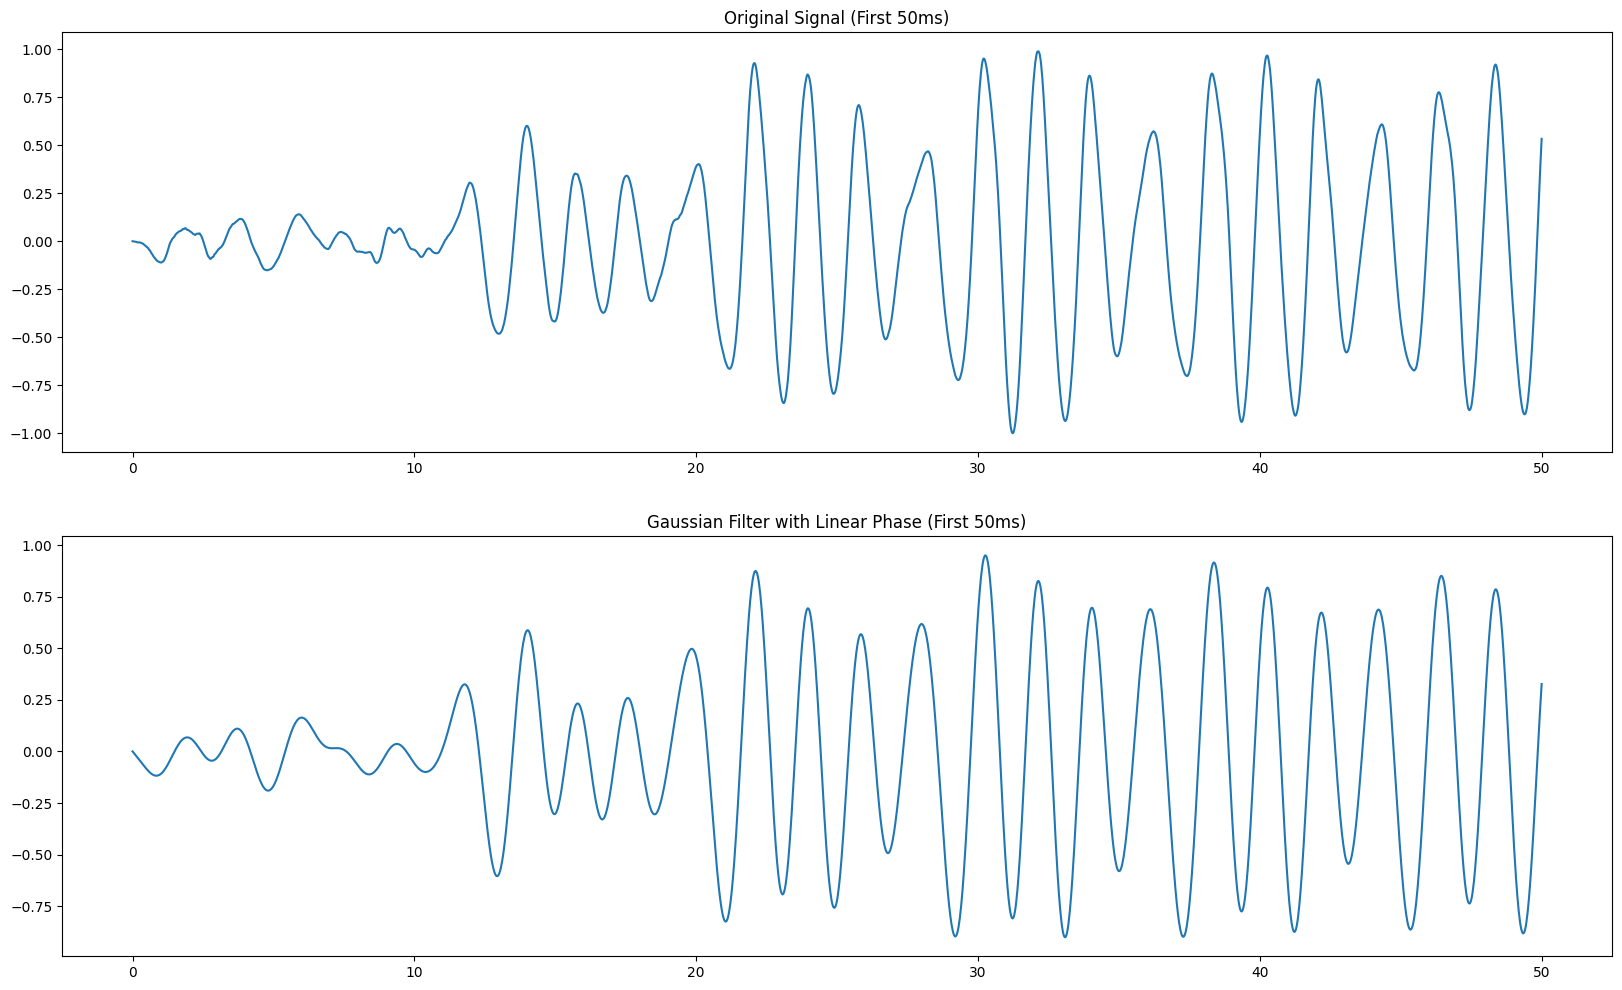

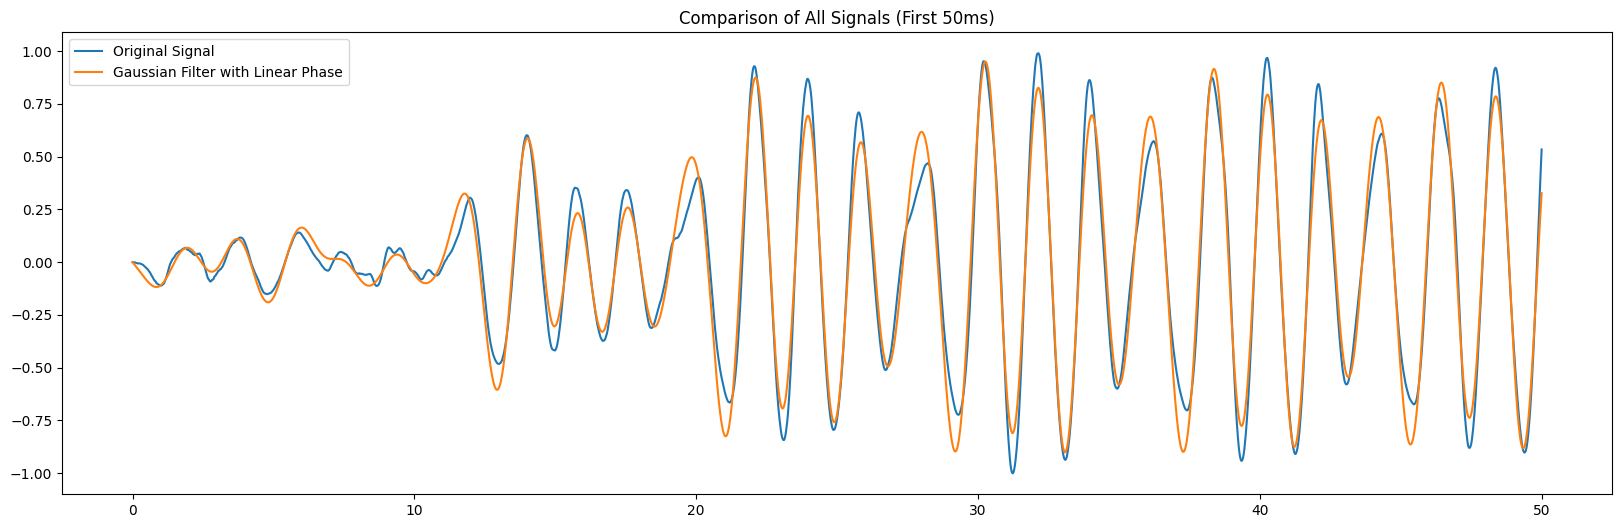

Original Signal (Full Length)


Gaussian Filtered Signal with Linear Phase (Full Length)


In [20]:
# Function to apply Gaussian Filter with Linear Phase (Forward-Backward Filtering)
def gaussian_filter_linear_phase(signal, window_size, sigma):
    gauss_kernel = np.exp(-(np.linspace(-2.5, 2.5, window_size))**2 / (2 * sigma**2))
    gauss_kernel /= np.sum(gauss_kernel)
    return filtfilt(gauss_kernel, 1, signal)

filename = list(uploaded.keys())[0]
fs, input_signal = wavfile.read(filename)

# Normalize signal to range -1 to 1
input_signal = input_signal / np.max(np.abs(input_signal))

# Select first 50 ms of the signal for plotting
time_in_ms = 50
samples = int(fs * time_in_ms / 1000)
input_signal_50ms = input_signal[:samples]

# Apply Gaussian Filter with Linear Phase (Forward-Backward Filtering) to the full signal
window_size = 51
sigma = 1.5
gaussian_linear_phase_signal_full = gaussian_filter_linear_phase(input_signal, window_size, sigma)

# Normalize the full signals for comparison
def normalize(signal):
    return signal / np.max(np.abs(signal))

gaussian_linear_phase_signal_full = normalize(gaussian_linear_phase_signal_full)

# Generate time axis in ms for plotting the first 50ms
time_axis_50ms = np.linspace(0, time_in_ms, len(input_signal_50ms))

# Plot and compare results
plt.figure(figsize=(20, 12))

# Original Signal (First 50ms)
plt.subplot(2, 1, 1)
plt.plot(time_axis_50ms, input_signal_50ms)
plt.title('Original Signal (First 50ms)')

# Gaussian Filter with Linear Phase (First 50ms)
plt.subplot(2, 1, 2)
plt.plot(time_axis_50ms, gaussian_linear_phase_signal_full[:samples])
plt.title('Gaussian Filter with Linear Phase (First 50ms)')

# Combined Plot (First 50ms)
plt.figure(figsize=(20, 6))
plt.plot(time_axis_50ms, input_signal_50ms, label='Original Signal')
plt.plot(time_axis_50ms, gaussian_linear_phase_signal_full[:samples], label='Gaussian Filter with Linear Phase')
plt.title('Comparison of Both Signals (First 50ms)')
plt.legend()
plt.show()

# Playback the full original and filtered signals
print("Original Signal (Full Length)")
display(Audio(input_signal, rate=fs))

print("Gaussian Filtered Signal with Linear Phase (Full Length)")
display(Audio(gaussian_linear_phase_signal_full, rate=fs))
